In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation,linear_model,preprocessing,decomposition
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [3]:
# Loading the Data
df = pd.read_csv("Hitters.csv")

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Data set description

**Variable** | **__ Description__** |** Type**
---|---|---
AtBat |Number of times at bat in 1986|Integer
Hits|Number of hits in 1986|Integer
HmRun |Number of home runs|Integer
RBI|Number of runs batted|Integer
Walks|Number of walks in 1986|Integer
Years|Number of years in the major leagues|Integer
CAtBat |Number of times at bat during his career |Integer
CHits |Number of hits during his career |Integer
CHmRun |Number of home runs during his career |Integer
CRuns |Number of runs during his career |Integer
CRBI |Number of runs batted in during his career |Integer
CWalks |Number of walks during his career League|Integer
League|A factor with levels A and N indicating player’s league |Qualitiative
Division|A factor with levels E and W indicating player’s division at the end of 1986|Qualitative
PutOuts |Number of put outs|Integer
Assists |Number of assists|Integer
Errors |Number of Errors|Integer
Salary |1987 Salary|Integer
NewLeague |A factor with levels A and N indicating player’s league|Qualitative



- n (number of records =322
- p (Columns = 20)
- Dependent varaiable - Salary

#### Problem Description - Predict Salary of players based on the 19 dependant variables



In [8]:
# 3 of the columns - League ,Division and NewLeague are categorical with non numeric labels
#Using label encoder to transform string categorical features into numeric
le = preprocessing.LabelEncoder()
temp = le.fit_transform(df.League)

le_1 = le = preprocessing.LabelEncoder()
temp_Division = le.fit_transform(df.Division)

le_2 = le = preprocessing.LabelEncoder()
temp_NewLeague = le.fit_transform(df.NewLeague)


df.League = temp
df.Division = temp_Division
df.NewLeague = temp_NewLeague


In [9]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,1
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,2
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,2
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,2


In [10]:
# Checking for Null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null int64
Division     322 non-null int64
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null int64
dtypes: float64(1), int64(19)
memory usage: 50.4 KB


In [11]:
# The response variable has NAN values for some items ,dropping the observations with NAN values
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null int64
Division     263 non-null int64
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null int64
dtypes: float64(1), int64(19)
memory usage: 43.1 KB


### Exploratory Data Ananlysis

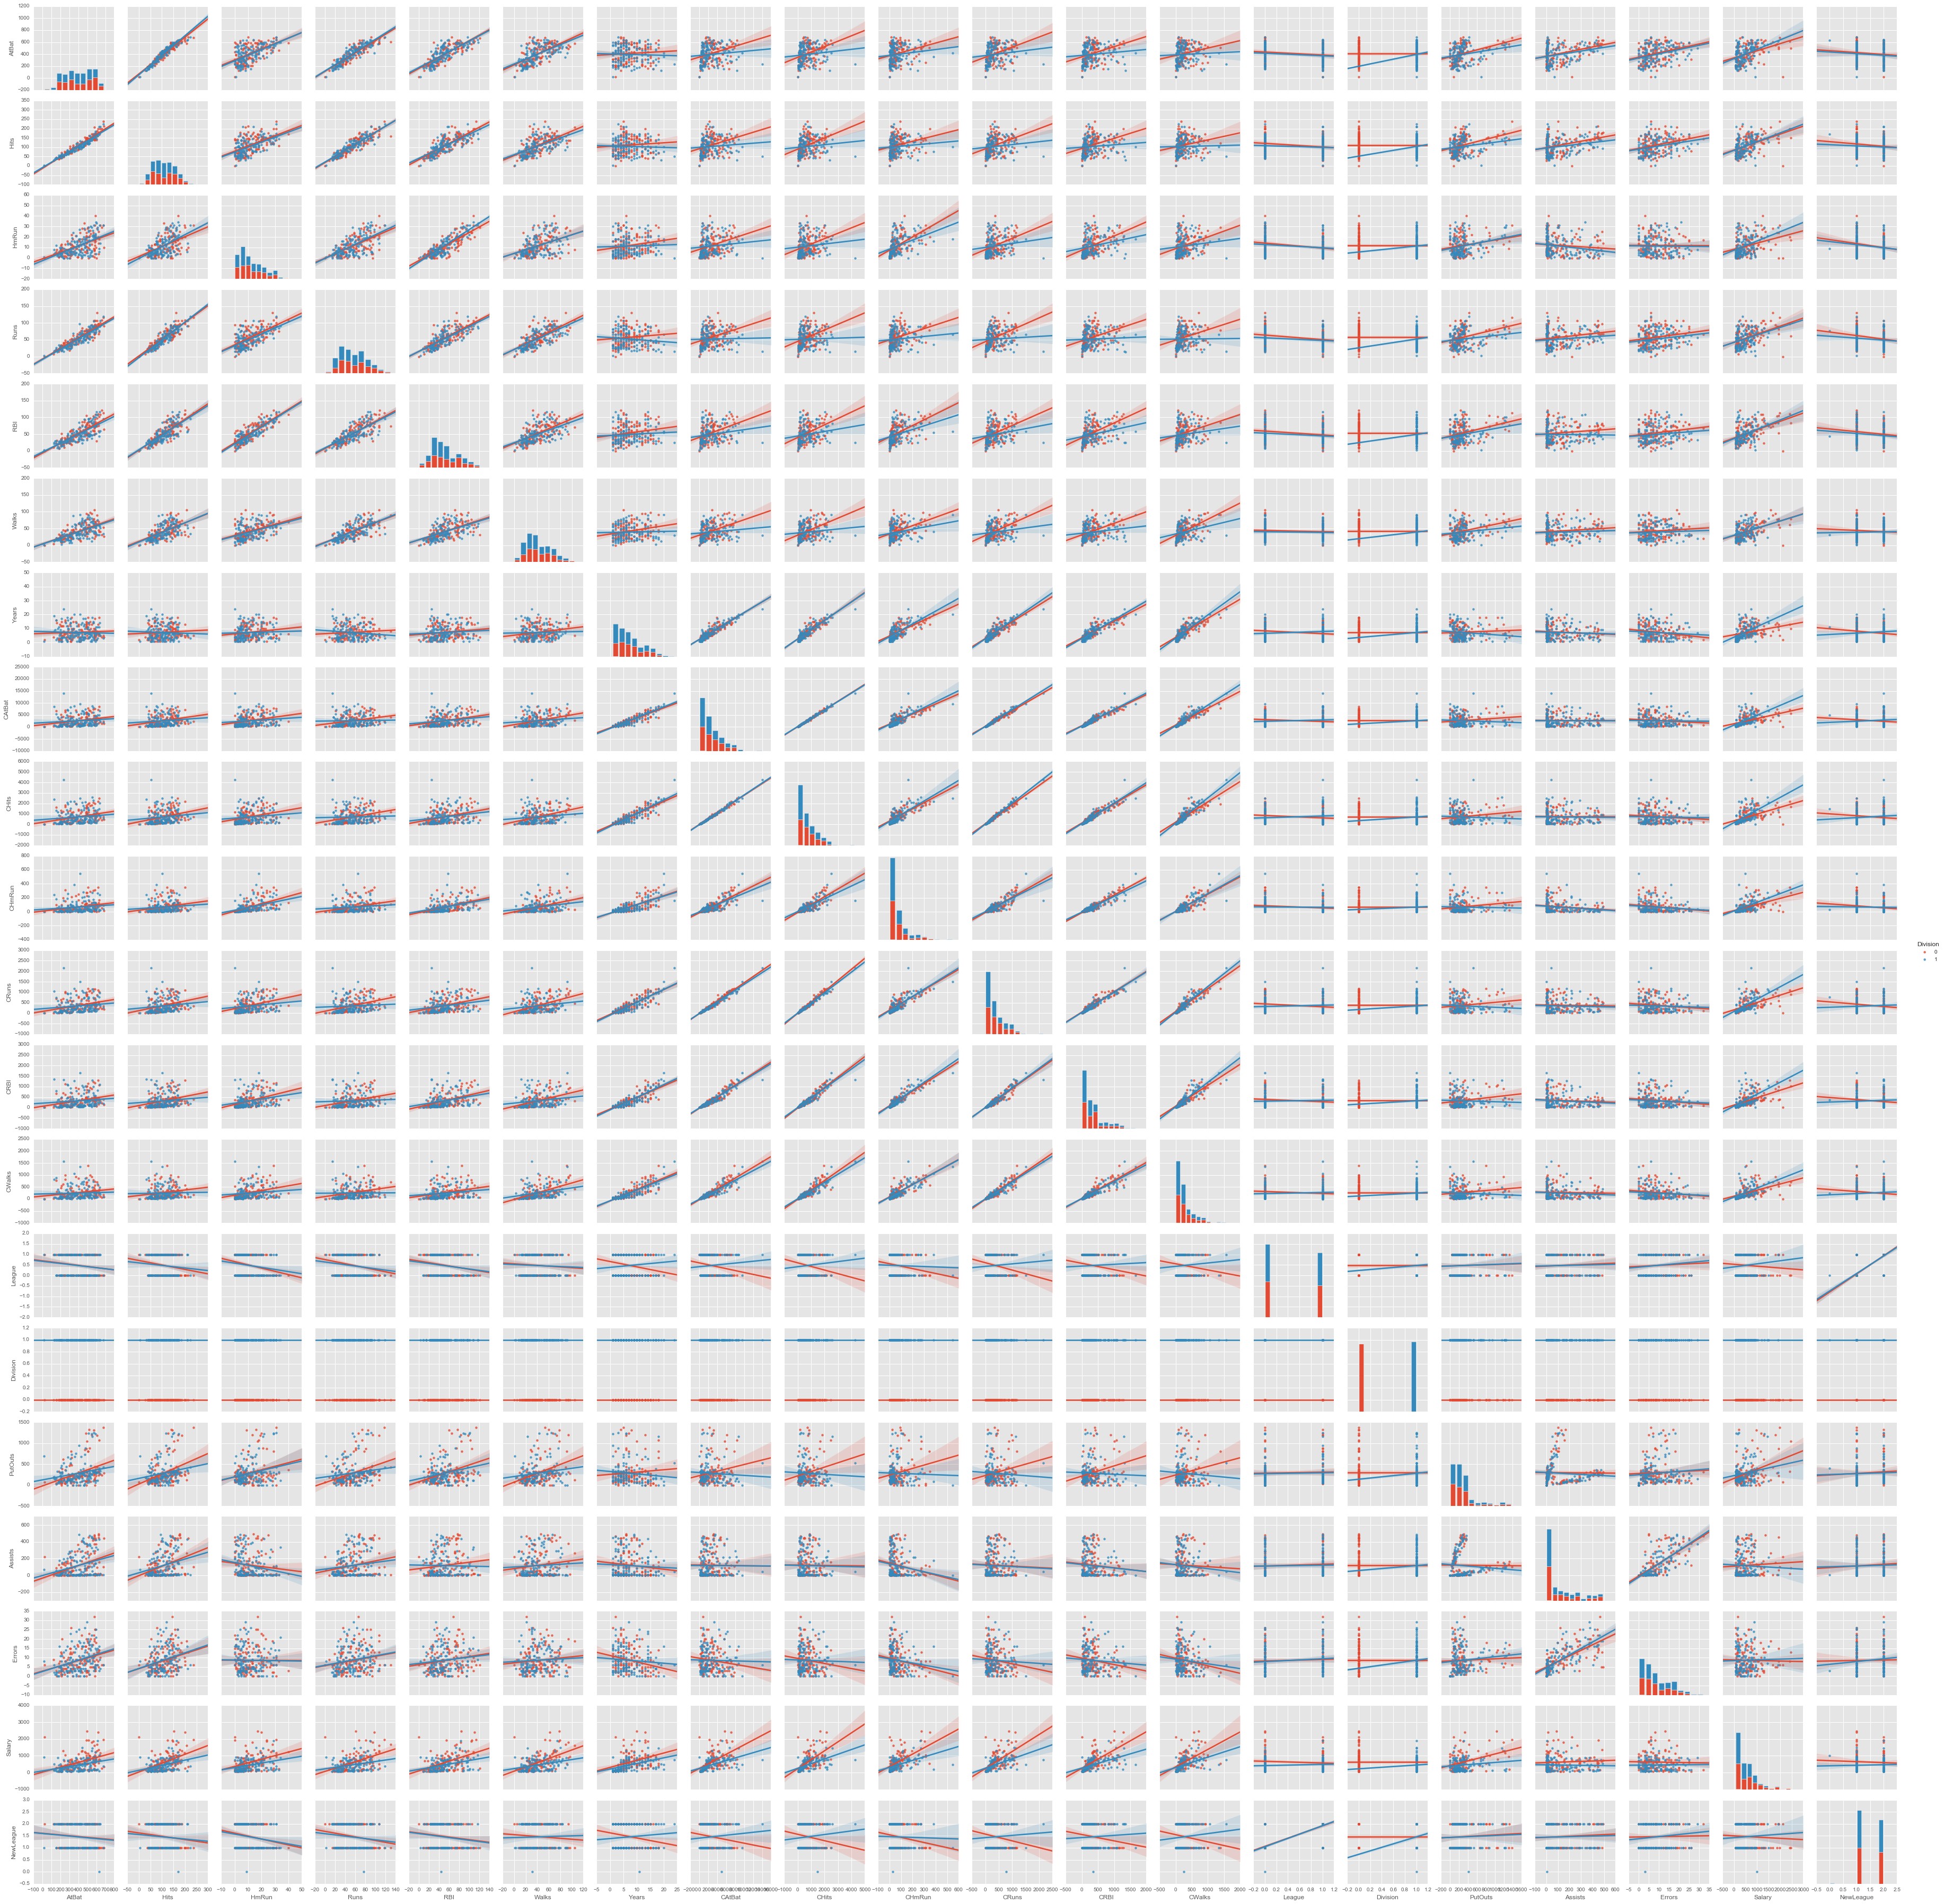

In [12]:
sns.pairplot(data = df , kind = 'reg' , hue = 'Division')

### Observations:
- The regression plot between Salary and Assist and Salary and Error is approx a horizontal line indicating that there is little relationship between these 2 variables


In [16]:
# Train Test split
X = df.drop(['Salary'],axis =1)
y = df.Salary
train_X , test_X, train_y,test_y = cross_validation.train_test_split(X,y,test_size=.2 , random_state=0)

#scaling the training set to avoid any particular feature exerting maximum variance
train_X = preprocessing.scale(train_X)

In [41]:
# Creating a data frame to hold the results of the iterations
df_eval = pd.DataFrame({'train_score':np.nan,'cv_score':np.nan,'exp_var':np.nan},index=[0])


In [44]:
p = decomposition.PCA().fit(train_X,train_y)
sum(p.explained_variance_ratio_)

1.0

In [46]:
for i in range(0,(train_X.shape[1])):
    #calling PCA to get the new set of predictor space
    pca = decomposition.PCA(n_components=i+1).fit(train_X,train_y)
    exp_var = sum(pca.explained_variance_ratio_)
    X_new = decomposition.PCA(n_components=i+1).fit_transform(train_X,train_y)
    #linear model fit on new features returned by PCA
    model_temp = linear_model.LinearRegression().fit(X_new,train_y)
    train_score = model_temp.score(X_new,train_y)
    cv_score = cross_validation.cross_val_score(model_temp,X_new,train_y,cv=10).mean()
    
    # populating the Data Frame:
    df_eval.loc[i ,'train_score'] = train_score
    df_eval.loc[i ,'cv_score'] = cv_score
    df_eval.loc[i ,'exp_var'] = exp_var
    
 
    
    
    

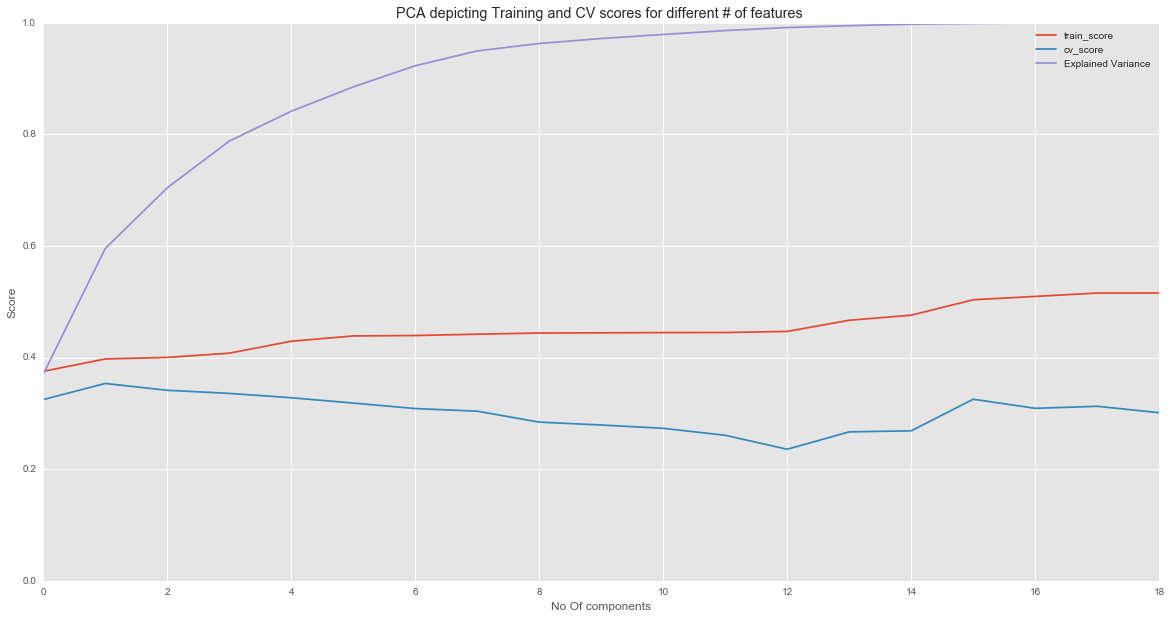

In [47]:
plt.figure(figsize=(20,10))
plt.plot(df_eval.index,df_eval.train_score,label='train_score')
plt.plot(df_eval.index,df_eval.cv_score,label='cv_score')
plt.plot(df_eval.index,df_eval.exp_var,label='Explained Variance')

plt.ylim([0,1])
plt.legend(loc = 'best')
plt.xlabel('No Of components')
plt.ylabel('Score')
plt.title('PCA depicting Training and CV scores for different # of features ')

In [39]:
# Finding the values for component that gives the maximum CV score
df_eval.loc[(df_eval.cv_score==df_eval.cv_score.max())]


,cv_score,train_score
1,0.353556,0.397464


In [48]:
df_eval.cv_score

0     0.324668
1     0.353556
2     0.341375
3     0.335749
4     0.327968
5     0.318433
6     0.308587
7     0.303903
8     0.284277
9     0.279120
10    0.273199
11    0.260741
12    0.235650
13    0.266821
14    0.268711
15    0.325299
16    0.309048
17    0.312663
18    0.301165
Name: cv_score, dtype: float64

## Conclusion

In [40]:
# Finding the values for Components that gives the maximum CV score
df_eval.loc[(df_eval.cv_score==df_eval.cv_score.max())]


,cv_score,train_score
1,0.353556,0.397464


#### Observations:
- From the plot , we can see that CV error is roughly the same when only 1 component is included in the model,suggesting that model that uses just a smaller number of components might suffice
- As is evident from the CV score ,We can use a model with # of predictor = 6(CV[6]=.30,CV[15]=.32) with very little loss of information.
- As expected the % of variation explained approaches 1 as more and more features are included in the model

